# <u>Open Data Example #1: City of Chicago Salaries</u>

*Source for Data Set:* City of Chicago Department of Human Resources

*URL for Data Set:* https://data.cityofchicago.org/Administration-Finance/Current-Employee-Names-Salaries-and-Position-Title/xzkq-xp2w

*Description of Data Set:* "This dataset is a listing of all current City of Chicago employees, complete with full names, departments, positions, and annual salaries. For hourly employees the annual salary is estimated." (Description written by City of Chicago) 

*File Format for Data Set:* CSV file (Comma Separated Values)

*Age of Data Set:* Last updated January 21, 2021

### <u>Import CSV File</u>

In [1]:
# Import pandas module
import pandas as pd

data = pd.read_csv("./Salaries_2023.csv")
# Read in the csv file (comma separated values)
# Print the last three entries of the file
    # The last line of a cell will print automatically!
    # Can sometimes display data differently
data[-3:]



,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
31120,"CHORZEPA, PETER J",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,"97,974.00",NaN
31121,"SEPCOT, SEAN W",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,"104,934.00",NaN
31122,"FOUCH, NICOLE M",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,"111,966.00",NaN


Sometimes, the last entry (or the last few entries) in a dataset may be erroneous. Use code similar to below to eliminate them.

    salary_DF = salary_DF.drop(salary_DF.index[-1])

*Note: This doesn't appear to be a problem with the 2022 version of this dataset, so you are unlikely to need to run the above code*

In [2]:
# Use this cell to run the code above (if needed)

# Note: Only run this code if your teacher says you need it

### <u>Question: How many employees are paid by the City of Chicago?</u>

In [3]:
# Print the length of the data frame
len(data)

31123

**<u>Your Answer:</u>** *Write a complete sentence that answers the question here.*

### <u>Modify Data: Create a List of Salaries</u>

In [4]:
# Store all values from the "Annual Salary" column
salary_list = data["Annual Salary"]

# Print the first 3 entries
salary_list[:3]

0          NaN
1    42,312.00
2    97,974.00
Name: Annual Salary, dtype: object

### <u>Modify Data to be Usable</u>

Step 0: If you have data with dollar signs, we would need to delete these symbols. This year's spreadsheet doesn't have any dollar signs, so we don't need to worry about this. But in previous years, we had to replace dollar signs with empty strings. In your own data projects, you'll want to check if this step is necessary. 

Step 1: Clean data by deleting dollar signs, '$', from the salaries and replace any empty strings with a salary of '0.00' dollars per year.

Step 2: Create a list with only salaries, converted from strings to floating point numbers. For example, the string '84450.0' becomes the floating point number 84450.0.

In [5]:
# This can delete '$' symbols if present before salaries
salary_list = salary_list.str.replace(",","")

# Convert to floating point number
    # Empty cells --> 0.00
salary_list = salary_list.astype(float)

# Print the last 4 entries
salary_list[-4:]


31119     97974.0
31120     97974.0
31121    104934.0
31122    111966.0
Name: Annual Salary, dtype: float64

It might come in handy later to have our salaries as floating point numbers. Let's replace the old column in our dataframe (string data) and replace it with our new one (floating point numbers):

In [6]:
# Delete the ORIGINAL data in "Annual Salary" column
del data["Annual Salary"]

# Replace with our NEW data
data["Annual Salary"] = salary_list

# Print first 10 entries

data[:10]


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
0,"CABALLERO, SAMUEL A",FOREMAN OF MOTOR TRUCK DRIVERS,DEPT STREETS AND SANITATION,F,HOURLY,40.0,41.41,NaN
1,"MITCHELL, MARY",TRAFFIC CONTROL AIDE,OFFICE OF EMERGENCY MANAGEMENT,F,SALARY,NaN,NaN,42312.0
2,"MUNOZ, LISSETTE C",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,NaN,97974.0
3,"ALDERDEN, JACOB M",CAPTAIN,DEPARTMENT OF POLICE,F,SALARY,NaN,NaN,159552.0
4,"JOHNSON, ANTHONY L",MOTOR TRUCK DRIVER,DEPT OF WATER MANAGEMENT,F,HOURLY,40.0,39.25,NaN
5,"AUGUSTINE, LORI A",POLICE OFFICER,DEPARTMENT OF POLICE,F,SALARY,NaN,NaN,97974.0
6,"SHALABI, MAJDI A",SERGEANT,DEPARTMENT OF POLICE,F,SALARY,NaN,NaN,133860.0
7,"KELLY, LUKE L",LIEUTENANT,DEPARTMENT OF POLICE,F,SALARY,NaN,NaN,150318.0
8,"FORSELL, JEREMIAH L",SERGEANT,DEPARTMENT OF POLICE,F,SALARY,NaN,NaN,129666.0
9,"SCHNOOR, KELLY A",LIEUTENANT,DEPARTMENT OF POLICE,F,SALARY,NaN,NaN,141552.0


### <u>Modify Data: Convert to a Numpy Number Array</u>

In [7]:
# Import numpy
import numpy as np

# Convert data to a numpy array
salary_list = np.array(salary_list)

# Print the last 30 values
salary_list[-30:]


array([117690.,  97974., 108822.,  97974., 111966., 101412., 104934.,
       117690., 110178., 108822., 104934., 101412., 108822., 108822.,
        97974., 101412.,  97974.,  97974., 104934., 113568., 108822.,
       111966., 111966., 111966., 117690., 111966.,  97974.,  97974.,
       104934., 111966.])

Look closely at this output, and you'll spot a problem: 

Some of our values are listed as "nan" or "not a number." If we are going to do some mathematical calculations with this data, we're going to need to clean the data by removing all instances of "nan." 

_Note: There may be several reasons why the dataset contains "nan" values. In some cases, an employee's salary data might be missing, there may have been a data entry error, an employee may have gone unpaid for a year because of an extended leave, or the employee may be working on a volunteer basis. Since there's no way to know how to interpret these values, it is best for us to do some data cleaning and remove them._ 

In [8]:
# Import numpy as np

# Eliminate the NaN entries
    # the ~ symbol is interpreted by numpy as "not"
salary_list = salary_list[~np.isnan(salary_list)]
# Print the last 30 entries
salary_list[-30:]

array([117690.,  97974., 108822.,  97974., 111966., 101412., 104934.,
       117690., 110178., 108822., 104934., 101412., 108822., 108822.,
        97974., 101412.,  97974.,  97974., 104934., 113568., 108822.,
       111966., 111966., 111966., 117690., 111966.,  97974.,  97974.,
       104934., 111966.])

### <u>Question: What is the average salary for city employees?<u>

In [9]:
# Calculate the average
avg = np.average(salary_list)
avg

99614.6520822325

**<u>Your Answer:</u>** The average salary for city employees is $99614.65



### <u>Question: What is the median salary for city employees?</u>

In [10]:
# Find the median value
med = np.median(salary_list)
med

101052.0

**<u>Your Answer:</u>** The median pay in Chicago is $101052.00.

**<u>Task:</u>** Use this cell to explain what the *median* of a dataset is.

**<u>Answer:</u>** *Write a complete sentence that answers the question here.*

### <u>Question: What is the number of salaried city employees?</u>

In [11]:
# Find the length of the array
len(salary_list)


24224

**<u>Your Answer:</u>** *Write a complete sentence that answers the question here.*

### <u>Question: What is the standard deviation of city employee salaries?</u>

In [12]:
# Find the standard deviation
np.std(salary_list)

24342.570205522694

**<u>Your Answer:</u>** The standard deviation is $24342.57

**<u>Task:</u>** Use this cell to explain what the *standard deviation* of a dataset is.

**<u>Your Answer:</u>** The standard deviation is a measure of the amount of variation or dispersion of a set of values.

### <u>Question: What is the highest salary among city employees?</u>

In [13]:
# Find the max value
max(salary_list)

275004.0

**<u>Your Answer:</u>** The highest salary is $275004.00

### <u>Question: The highest paid employee of the City of Chicago makes approximately $275,000 a year. Who is it? </u>

In [14]:
# Sort the array in ascending order
sorted_data = data.sort_values("Annual Salary", ascending=0)

# Print first entry only
sorted_data[:1]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
12971,"RHEE, JAMIE L",COMMISSIONER OF AVIATION,DEPARTMENT OF AVIATION,F,SALARY,NaN,NaN,275004.0


**<u>Your Answer:</u>** Jamie L Rhee is the highest paid employee in the city of Chicago.

### <u>Question: Who earns the top 10 salaries in the City of Chicago?</u>

In [15]:
# Print the first 10 entries of the sorted array
sorted_data[:10]



,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Hourly Rate,Annual Salary
12971,"RHEE, JAMIE L",COMMISSIONER OF AVIATION,DEPARTMENT OF AVIATION,F,SALARY,NaN,NaN,275004.0
10569,"BROWN, DAVID O",SUPERINTENDENT OF POLICE,DEPARTMENT OF POLICE,F,SALARY,NaN,NaN,260004.0
14181,"NANCE HOLT, ANNETTE M",FIRE COMMISSIONER,FIRE DEPARTMENT,F,SALARY,NaN,NaN,228612.0
6271,"LIGHTFOOT, LORI E",MAYOR,OFFICE OF THE MAYOR,F,SALARY,NaN,NaN,216210.0
15341,"SHERIDAN, MARY L",FIRST DEPUTY FIRE COMMISSIONER,FIRE DEPARTMENT,F,SALARY,NaN,NaN,207624.0
19943,"CARTER, ERIC M",FIRST DEPUTY SUPERINTENDENT,DEPARTMENT OF POLICE,F,SALARY,NaN,NaN,207612.0
19500,"BIAGI, GIA T",COMMISSIONER OF TRANSPORTATION,CHICAGO DEPT OF TRANSPORTATION,F,SALARY,NaN,NaN,204756.0
14050,"WALKER, ANNASTASIA M",EXEC DIR - OFFICE OF PUBLIC SAFETY ADM,PUBLIC SAFETY ADMINISTRATION,F,SALARY,NaN,NaN,204756.0
23206,"BROWN, CHRISTOPHER M",COMMISSIONER OF CHICAGO PUBLIC LIBRARY,CHICAGO PUBLIC LIBRARY,F,SALARY,NaN,NaN,204756.0
9186,"MADISON, SYBIL M",CHIEF OF STAFF,OFFICE OF THE MAYOR,F,SALARY,NaN,NaN,204756.0


**<u>Your Answer:</u>** The people who make the top 10 salaries are, Jamie Rhee, David Brown, Annette, Hold Nance, Lori Lightfoot, Mary Sheridan, Eric Carter, Gia Biagi, Annastasia Walker, Christopher Brown, Sybil Madison.

### <u>Visualization: Histogram of Salaries</u>

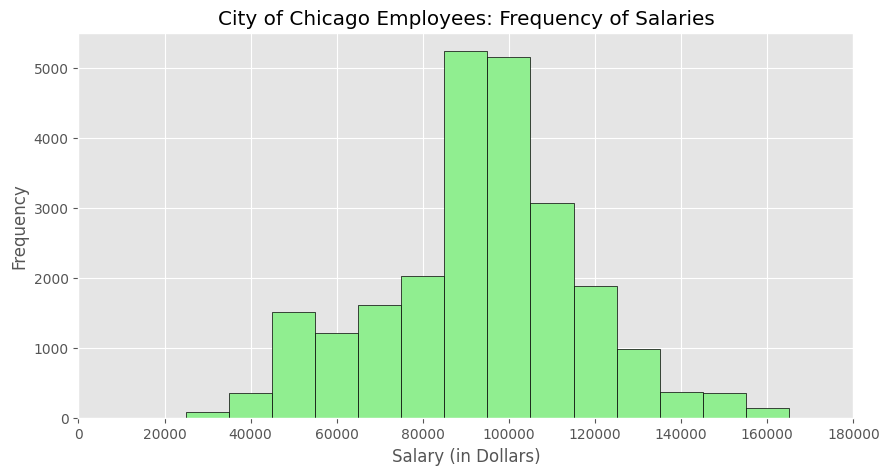

In [16]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Create bins array
bins = []
for i in range(18):
    bin = i * 10000
    bins.append(bin)
    
# Graph style
plot.style.use("ggplot")
plot.figure(figsize=(10,5))
plot.xlim([0,180000])

# Create title and lables
plot.title("City of Chicago Employees: Frequency of Salaries")
plot.xlabel("Salary (in Dollars)")
plot.ylabel("Frequency")

# Create histogram
plot.hist(salary_list, bins, align="left", color="lightgreen", edgecolor="black")
plot.show()

### <u>Question: How many employees per department in the City of Chicago?</u>

In [17]:
# Count the number of entries from each department
dep_freq = data["Department"].value_counts()

dep_freq

Department
DEPARTMENT OF POLICE                          12305
FIRE DEPARTMENT                                4768
DEPT OF WATER MANAGEMENT                       1982
DEPT STREETS AND SANITATION                    1948
DEPARTMENT OF AVIATION                         1927
CHICAGO DEPT OF TRANSPORTATION                 1215
CHICAGO PUBLIC LIBRARY                          975
DAIS                                            923
OFFICE OF EMERGENCY MANAGEMENT                  817
FAMILY AND SUPPORT SERVICES                     620
DEPARTMENT OF PUBLIC HEALTH                     612
DEPARTMENT OF FINANCE                           477
CITY COUNCIL                                    342
DEPARTMENT OF LAW                               325
PUBLIC SAFETY ADMINISTRATION                    275
DEPT OF BUILDINGS                               215
BUS AFFAIRS AND CONSUMER PROT                   167
DEPARTMENT OF PLANNING AND DEVELOPMENT          159
COPA                                            124
O

**<u>Your Answer:</u>** As the amount of employees varies greatly between different departments I suggest you refer to the table to find the count for your desired department.

### <u>Modify Data: Create a List of Departments and a List of Their Frequences</u>

These two lists will be useful when plotting.

In [18]:
# Create department names list
dep_names = dep_freq.index.tolist()

# Create frequency list
dep_counts = dep_freq.tolist()
# Print
print(dep_names)
print(dep_counts)

['DEPARTMENT OF POLICE', 'FIRE DEPARTMENT', 'DEPT OF WATER MANAGEMENT', 'DEPT STREETS AND SANITATION', 'DEPARTMENT OF AVIATION', 'CHICAGO DEPT OF TRANSPORTATION', 'CHICAGO PUBLIC LIBRARY', 'DAIS', 'OFFICE OF EMERGENCY MANAGEMENT', 'FAMILY AND SUPPORT SERVICES', 'DEPARTMENT OF PUBLIC HEALTH', 'DEPARTMENT OF FINANCE', 'CITY COUNCIL', 'DEPARTMENT OF LAW', 'PUBLIC SAFETY ADMINISTRATION', 'DEPT OF BUILDINGS', 'BUS AFFAIRS AND CONSUMER PROT', 'DEPARTMENT OF PLANNING AND DEVELOPMENT', 'COPA', 'OFFICE OF THE MAYOR', 'BOARD OF ELECTION COMMISSIONER', 'IG', 'DEPT OF HOUSING', 'DEPARTMENT OF PROCUREMENT SERV', 'CITY CLERK', 'DEPARTMENT OF HUMAN RESOURCES', 'DEPT OF CULTURAL AFFAIRS', 'COMM ANIMAL CARE AND CONTROL', 'OFFICE OF BUDGET & MANAGEMENT', 'DEPT OF ADMINISTRATIVE HEARING', 'CITY TREASURER', 'MAYORS OFFICE-DISABILITIES', 'COMMISSION ON HUMAN RELATIONS', 'CCPSA', 'BOARD OF ETHICS', 'OFFICE OF CLIMATE AND ENVIRONMENTAL EQUITY', 'POLICE BOARD', 'LICENSE APPEAL COMMISSION']
[12305, 4768, 1982,

### <u>Visualization: Pie Chart of Employees by Department</u>

Note: This pie chart has too many slices! We will need to fix it:

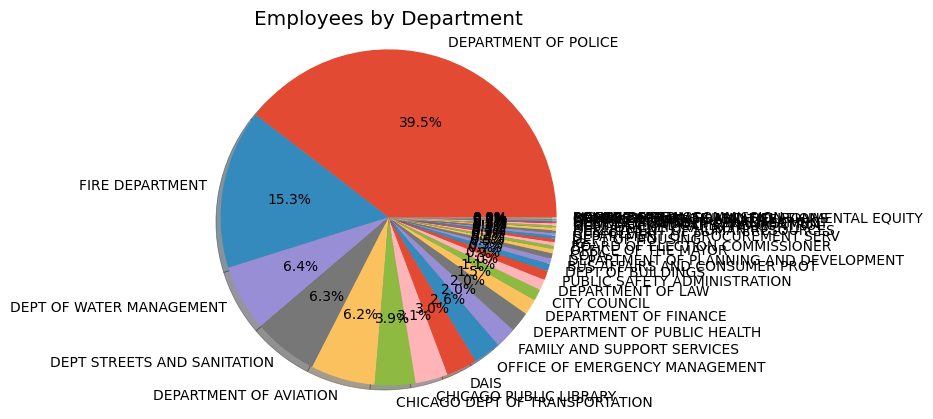

In [19]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Create labels and data array
labels = dep_names
pi_data = dep_counts

# Graph pie chart
plot.pie(pi_data, labels=labels, autopct="%1.1f%%", shadow=True)
plot.title("Employees by Department")
#plot.legend(title="Legend", loc="lower left")
plot.axis("equal")
plot.show()

### <u>Modify Data: If a Department is Not In the Top 10, Lump as 'Other'</u>

In [20]:
# Make new list of largest 10 names, add "OTHER"
shortened_names = dep_names[:10]
shortened_names.append("OTHER")

# Make new list of largets 10 counts, add sum of remaining
shortened_counts = dep_counts[:10]
remaining = sum(dep_counts[10:])
shortened_counts.append(remaining)

# Print two lists
print(shortened_names)
print(shortened_counts)

['DEPARTMENT OF POLICE', 'FIRE DEPARTMENT', 'DEPT OF WATER MANAGEMENT', 'DEPT STREETS AND SANITATION', 'DEPARTMENT OF AVIATION', 'CHICAGO DEPT OF TRANSPORTATION', 'CHICAGO PUBLIC LIBRARY', 'DAIS', 'OFFICE OF EMERGENCY MANAGEMENT', 'FAMILY AND SUPPORT SERVICES', 'OTHER']
[12305, 4768, 1982, 1948, 1927, 1215, 975, 923, 817, 620, 3643]


### <u>Visualization: Pie Chart of Number of Employees by Department (Fixed)</u>

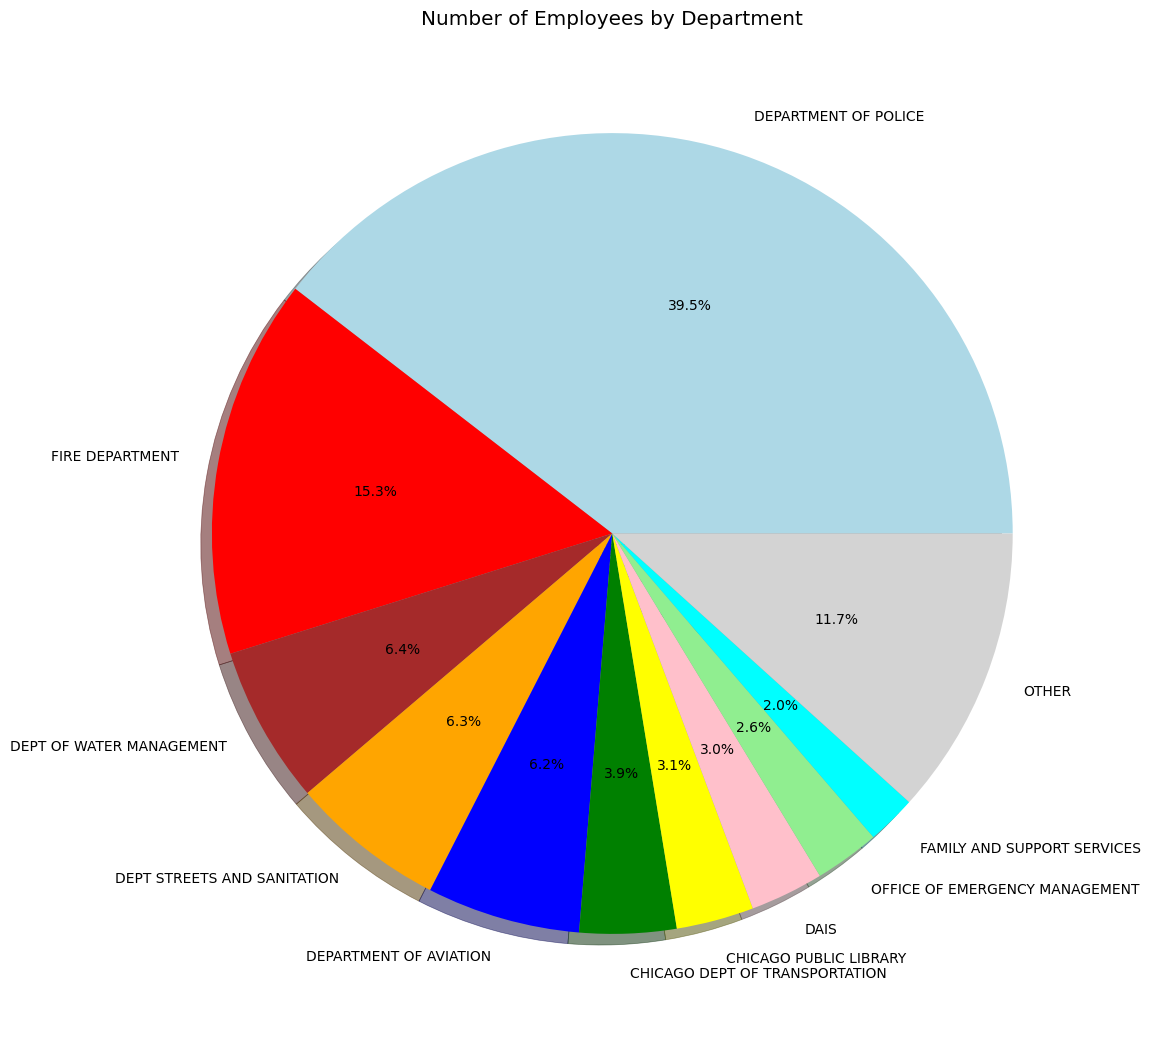

In [21]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Graph details
plot.figure(figsize=(13,13))
plot.title("Number of Employees by Department")
plot.style.use("ggplot")
colors_array = ["lightblue", "red", "brown", "orange", "blue", "green", "yellow", "pink", "lightgreen", "cyan", "lightgray"]

# Create pie chart
    # plot.pie(data array, labels array, color array, percentages, shadow)
plot.pie(shortened_counts, labels=shortened_names, colors=colors_array, autopct="%1.1f%%", shadow=True)
#plot.legend(title="Legend), loc="lower_left")
plot.show()

### <u>Question: What is the mean (average) salary in each department in the City of Chicago?</u>

In [22]:
# Group each department
dep_salary_avg = data["Annual Salary"].groupby(data["Department"]).mean()
dep_salary_avg

Department
BOARD OF ELECTION COMMISSIONER                 60881.009709
BOARD OF ETHICS                               114428.000000
BUS AFFAIRS AND CONSUMER PROT                  88825.600000
CCPSA                                         124065.333333
CHICAGO DEPT OF TRANSPORTATION                101216.633583
CHICAGO PUBLIC LIBRARY                         76720.947075
CITY CLERK                                     79696.012500
CITY COUNCIL                                   80694.711111
CITY TREASURER                                 98933.000000
COMM ANIMAL CARE AND CONTROL                   73314.400000
COMMISSION ON HUMAN RELATIONS                 103156.000000
COPA                                           92259.967742
DAIS                                          101556.330000
DEPARTMENT OF AVIATION                         84238.017983
DEPARTMENT OF FINANCE                          80707.376392
DEPARTMENT OF HUMAN RESOURCES                  95162.250000
DEPARTMENT OF LAW            

**<u>Your Answer:</u>** As the mean salary varies greatly between different departments I suggest you refer to the table to find the mean salary for your desired department.

### <u>Modify Data: Create a List of Departments and a List of Their Average Annual Salaries</u>

These two lists will be useful when plotting.

In [23]:
# Array of department names sorted by the average salary
dep_names_avg = dep_salary_avg.index.tolist()
# Array of salaries sorted by department
dep_avg = dep_salary_avg.tolist()

# Print
print(dep_names_avg)
print(dep_avg)

['BOARD OF ELECTION COMMISSIONER', 'BOARD OF ETHICS', 'BUS AFFAIRS AND CONSUMER PROT', 'CCPSA', 'CHICAGO DEPT OF TRANSPORTATION', 'CHICAGO PUBLIC LIBRARY', 'CITY CLERK', 'CITY COUNCIL', 'CITY TREASURER', 'COMM ANIMAL CARE AND CONTROL', 'COMMISSION ON HUMAN RELATIONS', 'COPA', 'DAIS', 'DEPARTMENT OF AVIATION', 'DEPARTMENT OF FINANCE', 'DEPARTMENT OF HUMAN RESOURCES', 'DEPARTMENT OF LAW', 'DEPARTMENT OF PLANNING AND DEVELOPMENT', 'DEPARTMENT OF POLICE', 'DEPARTMENT OF PROCUREMENT SERV', 'DEPARTMENT OF PUBLIC HEALTH', 'DEPT OF ADMINISTRATIVE HEARING', 'DEPT OF BUILDINGS', 'DEPT OF CULTURAL AFFAIRS', 'DEPT OF HOUSING', 'DEPT OF WATER MANAGEMENT', 'DEPT STREETS AND SANITATION', 'FAMILY AND SUPPORT SERVICES', 'FIRE DEPARTMENT', 'IG', 'LICENSE APPEAL COMMISSION', 'MAYORS OFFICE-DISABILITIES', 'OFFICE OF BUDGET & MANAGEMENT', 'OFFICE OF CLIMATE AND ENVIRONMENTAL EQUITY', 'OFFICE OF EMERGENCY MANAGEMENT', 'OFFICE OF THE MAYOR', 'POLICE BOARD', 'PUBLIC SAFETY ADMINISTRATION']
[60881.00970873787,

### <u>Visualization: Bar Chart of Average Annual Salary by Department</u>
#### <u>Sorted by Department Name</u>

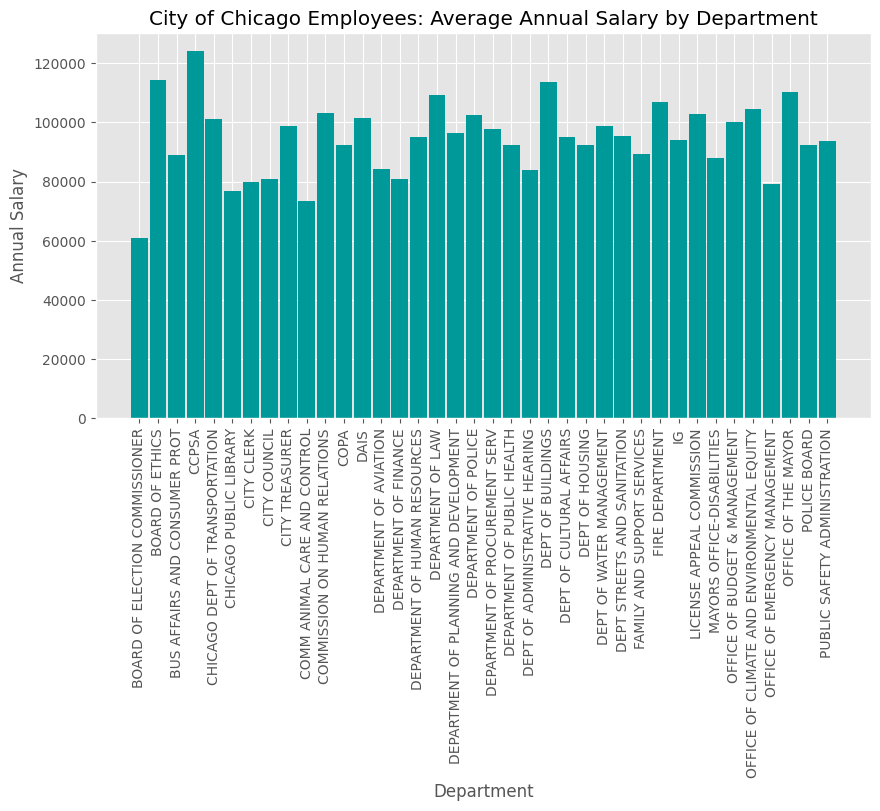

In [24]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Graph details
plot.style.use("ggplot")
plot.figure(figsize=(10,5))
plot.title("City of Chicago Employees: Average Annual Salary by Department")
plot.xlabel("Department")
plot.ylabel("Annual Salary")

length = len(dep_names_avg)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, dep_names_avg, rotation=90)
width = 0.9

# Bar graph
plot.bar(bar_pos, dep_avg, width, color="#009999")
plot.show()

### <u>Modify Data: Merge Our Two Lists Into a List of Tuples, Then Sort</u>

By sorting, we can get a nicer plot.

In [25]:
# List of tuples in the form (names, average salary)
sorted_average_list = []
for i in range(len(dep_names_avg)):
    sorted_average_list.append((dep_names_avg[i],dep_avg[i]))
# Sort the list in reverse
sorted_average_list.sort(key = lambda x: x[1], reverse=True)
# Print
sorted_average_list


[('CCPSA', 124065.33333333333),
 ('BOARD OF ETHICS', 114428.0),
 ('DEPT OF BUILDINGS', 113532.70046511629),
 ('OFFICE OF THE MAYOR', 110346.55102040817),
 ('DEPARTMENT OF LAW', 109334.2641509434),
 ('FIRE DEPARTMENT', 106817.74489932886),
 ('OFFICE OF CLIMATE AND ENVIRONMENTAL EQUITY', 104577.32),
 ('COMMISSION ON HUMAN RELATIONS', 103156.0),
 ('LICENSE APPEAL COMMISSION', 102732.0),
 ('DEPARTMENT OF POLICE', 102533.13337130767),
 ('DAIS', 101556.33),
 ('CHICAGO DEPT OF TRANSPORTATION', 101216.6335828877),
 ('OFFICE OF BUDGET & MANAGEMENT', 100309.42857142857),
 ('CITY TREASURER', 98933.0),
 ('DEPT OF WATER MANAGEMENT', 98732.82848),
 ('DEPARTMENT OF PROCUREMENT SERV', 97813.3670886076),
 ('DEPARTMENT OF PLANNING AND DEVELOPMENT', 96589.05660377358),
 ('DEPT STREETS AND SANITATION', 95459.0),
 ('DEPARTMENT OF HUMAN RESOURCES', 95162.25),
 ('DEPT OF CULTURAL AFFAIRS', 95151.375),
 ('IG', 94063.63636363637),
 ('PUBLIC SAFETY ADMINISTRATION', 93729.30902654867),
 ('DEPARTMENT OF PUBLIC HE

### <u>Visualization: Another Bar Chart of Average Annual Salary by Department</u> 

#### <u>Sorted by Average Annual Salary</u>

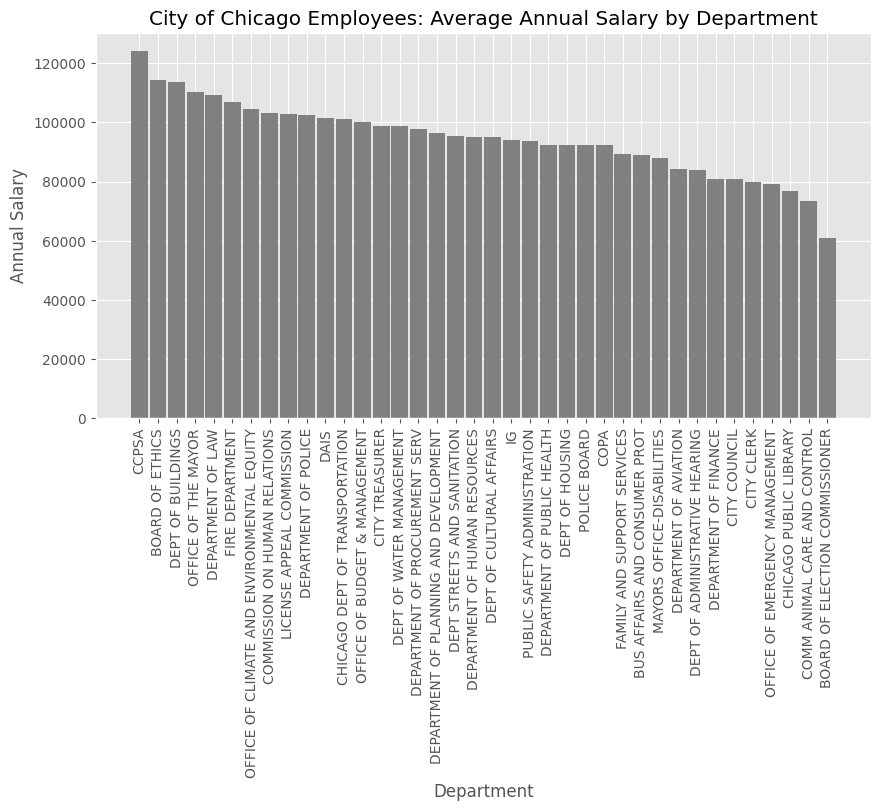

In [26]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('City of Chicago Employees: Average Annual Salary by Department')
plot.ylabel('Annual Salary')
plot.xlabel('Department')

# Create lists of sorted departements and total sums
x_data = [tuple[0] for tuple in sorted_average_list]
y_data = [tuple[1] for tuple in sorted_average_list]

length = len(sorted_average_list)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, x_data, rotation=90)
width = 0.9

plot.bar(bar_pos, y_data, width, color="gray")
plot.show()


**<u>Task:</u>** Explain what this code is doing: 
        
        x_data = [tuple[0] for tuple in sorted_average_list]

You can use this link as a resource for your explanation: 
https://www.pythonforbeginners.com/basics/list-comprehensions-in-python

**<u>Your Answer:</u>** *Write a complete sentence that addresses the question here.*

### <u>Question: What is the total salary expenditure in each department in the City of Chicago?</u>

In [27]:
# List of each departments total salary spending
dep_salary_sum = data["Annual Salary"].groupby(data["Department"]).sum()
dep_salary_sum

Department
BOARD OF ELECTION COMMISSIONER                6.270744e+06
BOARD OF ETHICS                               6.865680e+05
BUS AFFAIRS AND CONSUMER PROT                 1.465622e+07
CCPSA                                         1.116588e+06
CHICAGO DEPT OF TRANSPORTATION                3.785502e+07
CHICAGO PUBLIC LIBRARY                        5.508564e+07
CITY CLERK                                    6.375681e+06
CITY COUNCIL                                  2.178757e+07
CITY TREASURER                                3.264789e+06
COMM ANIMAL CARE AND CONTROL                  4.398864e+06
COMMISSION ON HUMAN RELATIONS                 1.547340e+06
COPA                                          1.144024e+07
DAIS                                          2.396729e+07
DEPARTMENT OF AVIATION                        6.014594e+07
DEPARTMENT OF FINANCE                         3.623761e+07
DEPARTMENT OF HUMAN RESOURCES                 7.612980e+06
DEPARTMENT OF LAW                            

**<u>Your Answer:</u>** As the total salary expendure varies greatly between different departments I suggest you refer to the table to find the total salary expendure for your desired department.

### <u>Modify Data: Create a Sorted List of Tuples</u>

In [28]:
# List of department names
dep_names_sum = dep_salary_sum.index.tolist()
# List of department total salary spending
dep_sum = dep_salary_sum.tolist()
# Create list a tuples in form (department name, department total salary spendi
# 'zip' binds two parallel arrays into tuples
sorted_sum_list = list(zip(dep_names_sum, dep_sum))
# Sort the list by total sums, in reverse
sorted_sum_list.sort(key = lambda x: x[1], reverse=True)
sorted_sum_list

[('DEPARTMENT OF POLICE', 1260029676.0),
 ('FIRE DEPARTMENT', 509307007.68),
 ('DEPARTMENT OF AVIATION', 60145944.84),
 ('DEPARTMENT OF PUBLIC HEALTH', 56523780.0),
 ('CHICAGO PUBLIC LIBRARY', 55085640.0),
 ('OFFICE OF EMERGENCY MANAGEMENT', 54138195.6),
 ('CHICAGO DEPT OF TRANSPORTATION', 37855020.96),
 ('DEPT OF WATER MANAGEMENT', 37024810.68),
 ('DEPARTMENT OF FINANCE', 36237612.0),
 ('DEPARTMENT OF LAW', 34768296.0),
 ('FAMILY AND SUPPORT SERVICES', 28386144.0),
 ('DEPT STREETS AND SANITATION', 27492192.0),
 ('DEPT OF BUILDINGS', 24409530.6),
 ('DAIS', 23967293.88),
 ('CITY COUNCIL', 21787572.0),
 ('PUBLIC SAFETY ADMINISTRATION', 21182823.84),
 ('DEPARTMENT OF PLANNING AND DEVELOPMENT', 15357660.0),
 ('BUS AFFAIRS AND CONSUMER PROT', 14656224.0),
 ('COPA', 11440236.0),
 ('OFFICE OF THE MAYOR', 10813962.0),
 ('IG', 9312300.0),
 ('DEPARTMENT OF PROCUREMENT SERV', 7727256.0),
 ('DEPARTMENT OF HUMAN RESOURCES', 7612980.0),
 ('DEPT OF HOUSING', 7573188.0),
 ('CITY CLERK', 6375681.0),
 (

### <u>Visualization: Bar Chart of Total Annual Salary Expenditure by Department</u>

#### <u>Sorted by Total Expenditure</u>
* y-axis expressed in billions of dollars (1 x 10^9 or 1e9)

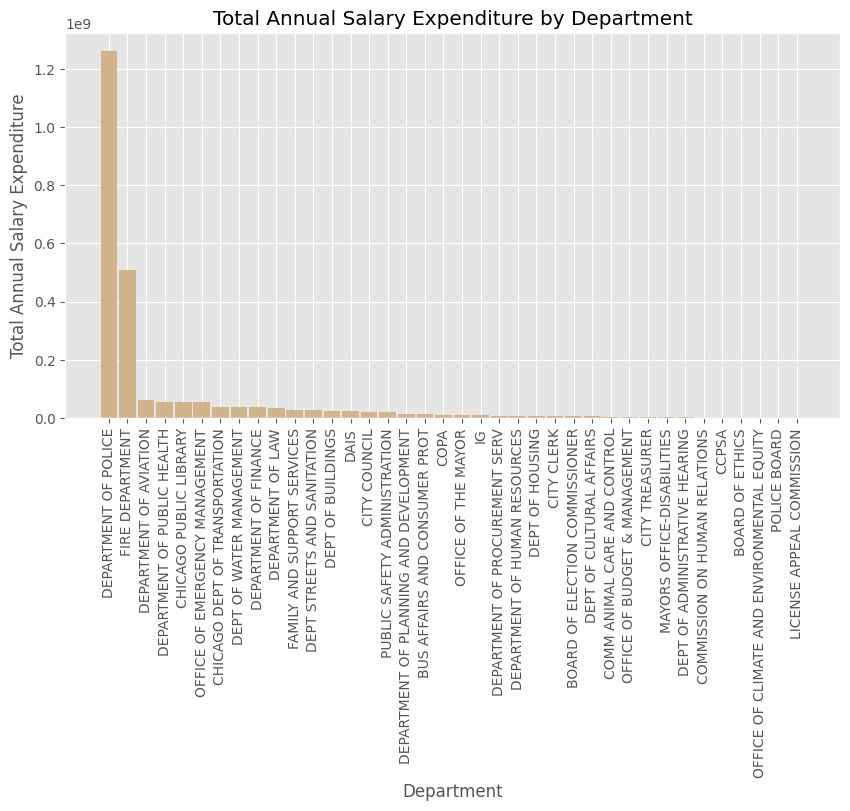

In [29]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('Total Annual Salary Expenditure by Department')
plot.ylabel('Total Annual Salary Expenditure')
plot.xlabel('Department')

# Create lists of sorted departements and total sums
x_data = [tuple[0] for tuple in sorted_sum_list]
y_data = [tuple[1] for tuple in sorted_sum_list]

length = len(sorted_sum_list)
bar_pos = np.arange(1, length+1)  # numpy array of numbers [1-36]
plot.xticks(bar_pos, x_data, rotation=90)
width = 0.9

# Bar graph
plot.bar(bar_pos, y_data, width, color="tan")

plot.show()

# <u>Open Data Example #2: School District Revenue and Enrollment</u>

*Source for Data Set:* The United States Census Bureau (via data.gov)

*URL for Data Set:* https://www.census.gov/data/tables/2019/econ/school-finances/secondary-education-finance.html

*Note:* You should get this dataset from Schoology, not the URL. The Schoology file has been cleaned to remove outliers (for example, districts with 0 students or 0 revenue).

*Description of Data Set:* This data has school enrollment versus total revenue for every school district in the United States in 2015 (the most recent data available).

*File Format for Data Set:* CSV file (Comma Separated Values)

*Age of Data Set:* 10/8/2021, accessed 4/5/2022

Read in the data:

In [30]:
# Import pandas
# Import pandas module
import pandas as pd

# Read in the csv file (comma separated values)
enrollment = pd.read_csv("./Enrollment_Revenue_2019.csv")

# print last 3
enrollment[-3:]

,NAME,Total Enrollment,Total Revenue
13265,ZUMBROTA-MAZEPPA SCH DISTRICT 2805,1204,17279
13266,ZUNI SCHOOL DISTRICT,1268,20295
13267,ZURICH ELEM DIST 17,21,391


Now plot:

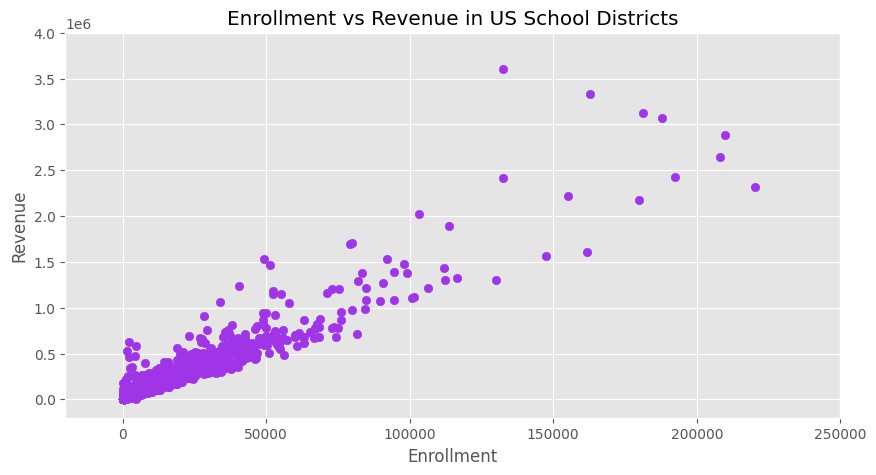

In [31]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

#enrollmentDF.plot(kind='scatter', x='Enrollment', y='Total Revenue');

# Graph details
plot.style.use("ggplot")  #fivethirty eight, bmh; grayscale, dark_background, ggplot
plot.figure(figsize=(10,5))
plot.title('Enrollment vs Revenue in US School Districts')
plot.ylabel('Revenue')
plot.xlabel('Enrollment')

x_data = enrollment["Total Enrollment"]
y_data = enrollment["Total Revenue"]
plot.xlim([-20000,250000])
plot.ylim([-200000,4000000])

# Scatter plot
plot.scatter(x_data, y_data, color="#A035E8")


plot.show()

### <u>Question: What seems to be the relationship between the number of students enrolled in a school district and the revenue of the district?</u>

### <u>Linear Regression</u>
* Modeling the relationship between two variables using a linear equation (straight line)
* Equation for a line in slope-intercept form:
    * y = mx + b
        * m = slope
        * b = y-intercept

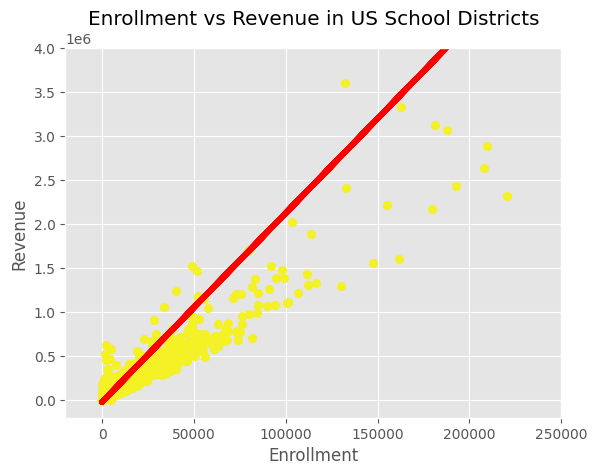

In [32]:
# Import matplotlib and numpy
import matplotlib.pyplot as plot
%matplotlib inline
import numpy as np

# Graph details
plot.title('Enrollment vs Revenue in US School Districts')
plot.ylabel('Revenue')
plot.xlabel('Enrollment')

x_data = enrollment["Total Enrollment"]
y_data = enrollment["Total Revenue"]
plot.xlim([-20000,250000])
plot.ylim([-200000,4000000])

# Use np.polyfit to calculate the slope and y-intercept for the 'line of best fit'
m, b = np.polyfit(x_data, y_data, 1)

# Scatter Plot
    # plot.plot(variable, equation, line width, color)
plot.plot(x_data, m*x_data + b, linewidth=4, color="red")
plot.scatter(x_data, y_data, color="#F4F124")

plot.show()

**<u>Your Answer:</u>** As seen on the plot as the number of students enrolled increases the amount of revenue increases.

### <u>Question: Explain the meaning of the code in the cell below. Then run it and interpret the resulting output.</u>

In [33]:
x0 = 125000
print(m*x0 + b)

2663096.676188589


**<u>Your Answer:</u>** The code uses the slope-intercept formula to plug in 12500 as the x into the equation for the above graph, and outputs the y-value which is aproximately 2663096.67618859.